###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, T. Meier and R. Hartmann, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Beispiele für Autokorrelationsfunktionen 

Nachdem wir die KKF und AKF als Maße für die Korrelation zwischen Zeitreihen gegenüber einer Zeitverschiebung eingeführt hatten, soll im folgenden die AKF und deren Eigenschaften anhand einiger Beispiele illustriert werden.

## AKF der Rechteckfunktion

Als erstes Beispiel betrachten wir die AKF der **Rechteckfunktion** (engl. Boxcarfunktion)

$x(t)=\mathrm{boxcar}(t,T)=\begin{cases}1&:t\in[0,T]\\0&:\text{ sonst}\end{cases},$

wobei T die Breite des Rechtecks bezeichnet. An den Stellen 0 und T befinden sich Unstetigkeitsstellen. Berechnen wir eine zeitverschobene Rechteckfunktion mit einer Breite von T = 10 s:

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
import numpy                      # Bibliothek NumPy
from scipy import signal          # Bibliothek SciPy
from gsv.gsv_func import *        # Bibliothek "Geophysikalische Signalverarbeitung"

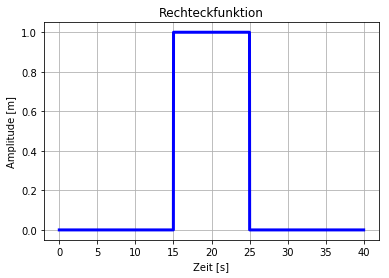

In [3]:
# Definiere Rechteckfunktion
# --------------------------
T = 10.0                        # Breite der Rechteckfunktion [s]
time, rectf = create_rectf(T)   # Erzeuge Rechteckfunktion

# Plotte Rechteckfunktion
draw_func(time,rectf,'Rechteckfunktion', 'Zeit [s]', 'Amplitude [m]')

Die AKF der Rechteckfunktion ist:

\begin{equation}
\rho_{x,x}(\tau)=
\begin{cases}
T-|\tau|&:\tau\in[-T,T]\\
0&:\text{ sonst}
\end{cases}
\notag
\end{equation}

**Beweis**

\begin{equation*}
\begin{split}
\rho_{x,x}(\tau)&=\int\limits_{\mathbb{R}}x(t^{\prime})\cdot x(t^{\prime}+\tau)\mathrm{dt^{\prime}}\\
&=\begin{cases}
\int_{|\tau|}^{T}\mathrm{dt^{\prime}}&:\tau\in[-T,0]\\
\int_{0}^{T-|\tau|}\mathrm{dt^{\prime}}&:\tau\in[0,T]\\
0&:\text{ sonst}
\end{cases}=\begin{cases}
T-|\tau|&:\tau\in[-T,T]\\
0&:\text{ sonst}
\end{cases}
\end{split}
\end{equation*}

Vergleichen wir die analytische AKF mit der numerischen AKF:

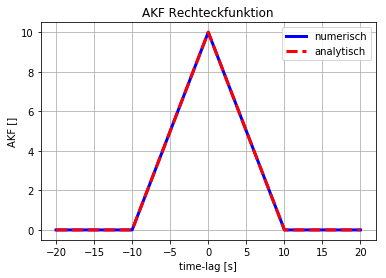

In [4]:
# AKF der Rechteckfunktion
AKF_rect = signal.correlate(rectf, rectf, mode='same')

# Bestimme Sample-Intervall dt und multipliziere mit AKF_rect
# um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
AKF_rect = AKF_rect * dt

# Berechne time-lags
nt = len(AKF_rect)                  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der Rechteckfunktion
comp_AKF_rect(lags,AKF_rect,T,'AKF Rechteckfunktion', 'time-lag [s]', 'AKF []')

## AKF von $\delta$-Funktionen

Sei $\delta(t)$ die $\delta$-Funktion:

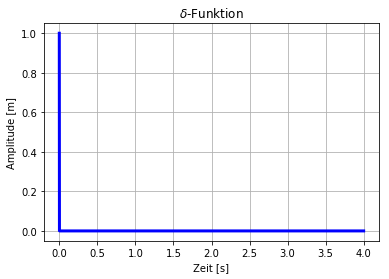

In [5]:
# Definiere Delta-Funktion
# ------------------------
ts = 0.0                             # Time-shift der Delta-Funktion
amp = 1.0                            # Amplitude der Delta-Funktion
time, deltaf = create_delta(ts,amp)  # Erzeuge Delta-Funktion

# Plotte Deltafunktion
draw_func(time,deltaf,r'$\delta$-Funktion', 'Zeit [s]', 'Amplitude [m]')

Ihre AKF ist wieder die $\delta$-Funktion:

\begin{equation}
\rho_{\delta,\delta}(\tau)=\delta(\tau) \notag
\end{equation}

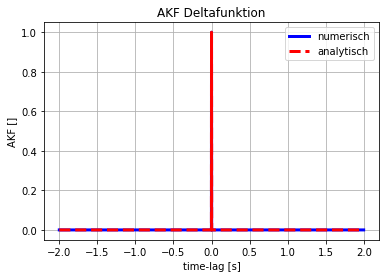

In [6]:
# AKF der Deltafunktion
AKF_delta = signal.correlate(deltaf, deltaf, mode='same')

# Berechne time-lags
dt = time[1] - time[0]              # Sample-Intervall 
nt = len(AKF_delta)                 # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der Deltafunktion
comp_AKF_delta(lags,AKF_delta,amp,'AKF Deltafunktion', 'time-lag [s]', 'AKF []')

##### Man beachte: 
Die Delta-Funktion besitzt keine Fläche. Außerdem ist das Integral nur über eine Normierung definiert. Deshalb muß in diesem Fall das numerische Ergebnis AKF_delta **NICHT** mit dt multipliziert werden.

Sei $\delta(t-t_{0})$ die um $t_{0}$ verschobene $\delta$-Funktion.

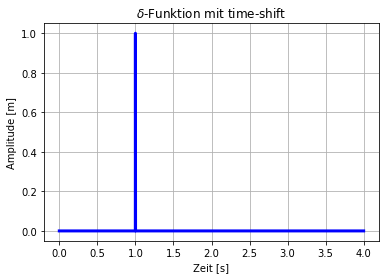

In [7]:
# Definiere Delta-Funktion mit Time-shift
# ---------------------------------------
ts = 1.0                                 # Time-shift der Delta-Funktion
amp1 = 1.0                               # Amplitude der Delta-Funktion
time, deltaf_ts = create_delta(ts,amp1)  # Erzeuge Delta-Funktion

# Plotte Deltafunktion
draw_func(time,deltaf_ts,r'$\delta$-Funktion mit time-shift', 'Zeit [s]', 'Amplitude [m]')

Wie in dem letzten Notebook gezeigt wurde, ist eine Eigenschaft der KKF und AKF, daß diese invariant gegenüber eines time-shifts der Zeitreihen ist. Entsprechend ist die AKF einer  zeitverschobene $\delta$-Funktion die $\delta$-Funktion ohne time-shift:

$\rho_{\delta,\delta}(\tau)=\delta(\tau)$ 

für alle $t_{0}\in\mathbb{R}$

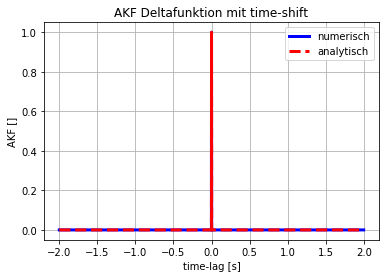

In [8]:
# AKF der zeitverschobenen Deltafunktion
AKF_delta_ts = signal.correlate(deltaf_ts, deltaf_ts, mode='same')

# Berechne time-lags
dt = time[1] - time[0]  # Sample Intervall
nt = len(AKF_delta_ts)  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der zeitverschobenen Deltafunktion
comp_AKF_delta(lags,AKF_delta_ts,amp1,'AKF Deltafunktion mit time-shift', 'time-lag [s]', 'AKF []')

Sei 

$x(t)=a\delta(t)+b\delta(t-t_{0})$ 

mit $a,b\in\mathbb{R}$ die Überlagerung zweier $\delta$-Funktionen. 

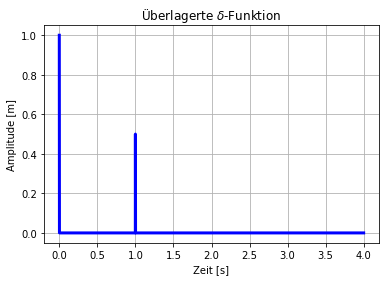

In [9]:
# Definiere Überlagerung von zwei Delta-Funktion
# ----------------------------------------------

# 1. Berechne einzelne Delta-Funktionen
# -------------------------------------
ts1 = 0.0                              # Time-shift der Delta-Funktion
a = 1.0                                # Amplitude der Delta-Funktion
time, deltaf_1 = create_delta(ts1,a)   # Erzeuge zweite Delta-Funktion

ts2 = 1.0                              # Time-shift der Delta-Funktion
b = 0.5                                # Amplitude der Delta-Funktion
time, deltaf_2 = create_delta(ts2,b)   # Erzeuge zweite Delta-Funktion

# 2. Überlagere einzelne Delta-Funktionen
# --------------------------------------
delta_sum = deltaf_1 + deltaf_2


# Plotte Deltafunktion
draw_func(time,delta_sum,r'Überlagerte $\delta$-Funktion', 'Zeit [s]', 'Amplitude [m]')

Ihre AKF ist:

\begin{equation}
\rho_{x,x}(\tau)=(a^2+b^2)\delta(\tau) + ab\delta(\tau-t_0) + ab\delta(\tau+t_0) \notag
\end{equation}

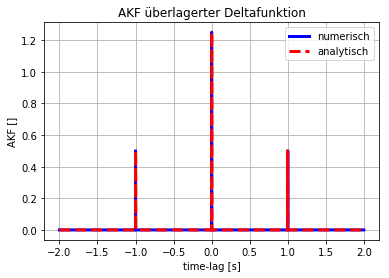

In [10]:
# AKF von überlagerten Deltafunktion
AKF_delta_sum = signal.correlate(delta_sum, delta_sum, mode='same')

# Berechne time-lags
dt = time[1] - time[0]  # Sample Intervall
nt = len(AKF_delta_sum)  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der überlagerten Deltafunktionen
comp_AKF_delta_sum(lags,AKF_delta_sum,ts2,a,b,'AKF überlagerter Deltafunktion', 'time-lag [s]', 'AKF []')

Man beachte daß die time-lags ungleich Null der Zeitdifferenz zwischen der ersten und zweiten Deltafunktion entsprechen.

## AKF einer Gaußschen Glockenkurve

Sei die **Gaußsche Glockenkurve** 

$x(t)=a\;\exp(-\frac{t^{2}}{2T^{2}})$ 

mit der Breite $T$ und Amplitude $a$:

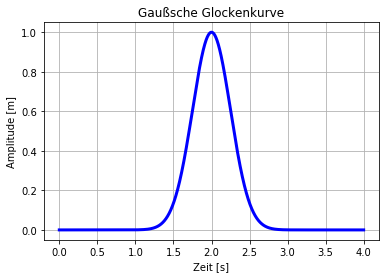

In [11]:
# Definiere Gaußsche Glockenkurve
# -------------------------------
ts = 2.0        # Time-shift der Glockenkurve
a = 1.0         # Amplitude der Glockenkurve
T = 0.25        # Breite der Glockenkurve

time, gaussf = create_gauss(ts,T,a)  # Erzeuge Glockenkurve

# Plotte Deltafunktion
draw_func(time,gaussf,'Gaußsche Glockenkurve', 'Zeit [s]', 'Amplitude [m]')

Ihre AKF ist erneut eine Gaußsche Glockenkurve:

\begin{equation}
\rho_{x,x}(\tau)=a^{2}T\sqrt{\pi}\exp\left(-\frac{\tau^{2}}{4T^{2}}\right) \notag
\end{equation}

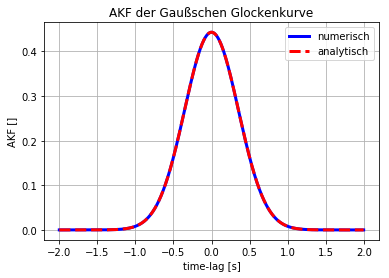

In [12]:
# AKF der Gaußschen Glockenkurve
AKF_gauss = signal.correlate(gaussf, gaussf, mode='same')

# Bestimme Sample-Intervall dt und multipliziere mit AKF_gauss
# um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
AKF_gauss = AKF_gauss * dt

# Berechne time-lags
nt = len(AKF_gauss)  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der Gaußschen Glockenkurve
comp_AKF_gauss(lags,AKF_gauss,a,T,'AKF der Gaußschen Glockenkurve', 'time-lag [s]', 'AKF []')

## AKF einer harmonischen Schwingung

Es sei eine harmonische Schwingung auf dem Intervall $[0,T]$ gegeben:

$y(t)=\begin{cases}x(\omega_0, t)&:t\in[0,T]\\0&:\text{ sonst}\end{cases}$

Zum Beispiel die Sinusfunktion:    

$x(t) = \sin(\omega_0 t)$

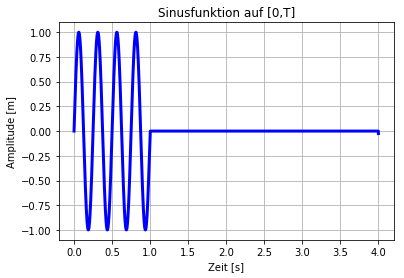

In [13]:
# Definiere Sinusfunktion auf einem Zeitintervall T
# -------------------------------------------------
f0 = 4                               # Frequenz der Sinusfunktion [Hz]
T = 1                                # Länge des Zeitintervalls T [s]
time, sinef = create_sine_int(f0,T)  # Erzeuge Sinusfunktion auf [0,T]

# Plotte Sinusfunktion
draw_func(time,sinef,'Sinusfunktion auf [0,T]', 'Zeit [s]', 'Amplitude [m]')

Dann ist die AKF:

\begin{equation}
\rho_{y,y}(\tau)=\frac{1}{T}\int\limits_{0}^{T}x(t^{\prime})x(t^{\prime}+\tau)\mathrm{dt^{\prime}}=
\begin{cases}
\frac{1}{2}\left(1-\frac{|\tau|}{T}\right)\cos(\omega_{0}\tau)&:\tau\in[-T,T]\\
0&:\text{ sonst}
\end{cases}
\notag
\end{equation}

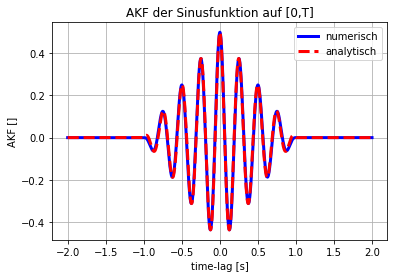

In [14]:
# AKF der Sinusfunktion auf einem Zeitintervall T
AKF_sine = signal.correlate(sinef, sinef, mode='same')

# Bestimme Sample-Intervall dt und multipliziere mit AKF_gauss
# um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
AKF_sine = AKF_sine * dt

# Berechne time-lags
nt = len(AKF_sine)  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF der Sinusfunktion
comp_AKF_sine(lags,AKF_sine,f0,T,'AKF der Sinusfunktion auf [0,T]', 'time-lag [s]', 'AKF []')

##### Man beachte: 

- Die AKF einer Sinusfunktion ist unabhängig von der Phasenverschiebung eine Cosinusfunktion, da die AKF invariant gegenüber Zeitverschiebungen ist

- Die endliche Länge des Beobachtungsintervalls führt zu einer Wichtung mit der AKF eines Boxcars

Die erwartungstreue AKF lautet dagegen:

\begin{equation}
\rho_{y,y}(\tau)=\frac{1}{T-|\tau|}\int\limits_{0}^{T}x(t^{\prime})x(t^{\prime}+\tau)\mathrm{dt^{\prime}}=
\begin{cases}
\frac{1}{2}T\cos(\omega_{0}\tau)&:\tau\in[-T,T]\\
0&:\text{ sonst}
\end{cases}
\notag
\end{equation}

Allerdings beruht die Bestimmung der AKF für große Zeitverschiebungen nur auf wenigen Werten und ist im Fall stochastischer Signale weniger signifikant.

/home/daniel-koehn/miniconda3/envs/salvus/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/daniel-koehn/lectures/Geophysikalische-Signalverarbeitung/gsv/gsv_func.py:221: RuntimeWarning: invalid value encountered in true_divide
  AKF_an = 0.5 * T * (1-(np.abs(lags)/T))*np.cos(w0*lags) / (T - np.abs(lags))


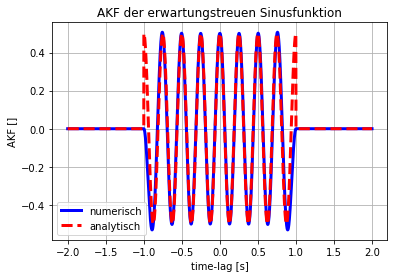

In [15]:
# AKF der erwartungstreuen Sinusfunktion auf einem Zeitintervall T
AKF_sine_1 = T * AKF_sine / (T - np.abs(lags))

# Plotte AKF der Rechteckfunktion
comp_AKF_sine_1(lags,AKF_sine_1,f0,T,'AKF der erwartungstreuen Sinusfunktion', 'time-lag [s]', 'AKF []')

Es gibt einige numerische Probleme (Division-by-zero) bei den Lags 

$[-T,T] = [-1\; s,1\; s]$.

Trotzdem ist erkennbar wie die erwartungstreue AKF der Sinusfunktion den Effekt der Boxcar AKF ausgleicht.

## Auto- & Kreuzkovarianz von Zufallsprozessen

Sei $\{n_j\}$ ein [iid](https://de.wikipedia.org/wiki/Unabh%C3%A4ngig_und_identisch_verteilte_Zufallsvariablen)-verteilter stochastischer Prozess (**weißes Rauschen**): 

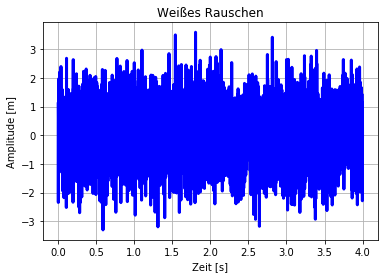

In [16]:
# Erzeuge weißes Rauschen mit normalverteilten Zufallszahlen
mean = 0              # Mittelwert 
std = 1               # Standardabweichung

time, white_noise = create_white_noise(mean,std)  # Erzeuge weißes Rauschen

# Plotte Sinusfunktion
draw_func(time,white_noise,'Weißes Rauschen', 'Zeit [s]', 'Amplitude [m]')

Die Autokovarianz des weißen Rauschens lautet dann:

\begin{equation}
\rho_{n,n}(k)=E[n_j \cdot n_{j+k}]=\sigma_{n}^{2}\delta(k) \notag
\end{equation}

Dabei ist $\sigma_n^2$ die Varianz der Amplitude des Rauschens und $\delta(k)$ die $\delta$-Funktion.

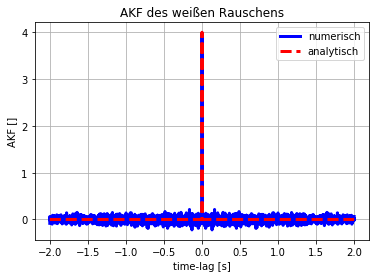

In [17]:
# AKF des weißen Rauschens
AKF_wnoise = signal.correlate(white_noise, white_noise, mode='same')

# Bestimme Sample-Intervall dt und multipliziere mit AKF_wnoise
# um korrekte Amplituden zu erhalten
dt = time[1] - time[0]
AKF_wnoise = AKF_wnoise * dt

# Berechne time-lags
nt = len(AKF_wnoise)  # Anzahl der Samples der AKF
lags = np.arange(-nt/2,nt/2,1) * dt # time-lags

# Plotte AKF des weißen Rauschens
comp_AKF_wnoise(lags,AKF_wnoise,std,'AKF des weißen Rauschens', 'time-lag [s]', 'AKF []')

Das Spektrum der Autokovarianz des weißen Rauschen ist frequenzunabhängig:

\begin{equation}
\mathfrak{F}\{\rho_{n,n}(k)\}=\sigma_{n}^{2}=\mathrm{const.} \notag
\end{equation}

Alle Frequenzen sind gleichermaßen enthalten wie bei weißem Licht. Daher kommt der Name weißes Rauschen. 

Dies gilt nicht für farbiges Rauschen, bei dem bestimmte Frequenzen dominieren. 

\begin{equation}
\mathfrak{F}\{\rho_{n,n}(k)\}=|N(\omega)|^2\neq\mathrm{const.} \notag
\end{equation}

Man spricht auch von rotem Rauschen, wenn die tiefen Frequenzen dominieren. 

Seien $\{x_j\}$, $\{y_j\}$ unkorrelierte stochastische Prozesse. Dann gilt für die Kreuzkovarianz (per Definition):

\begin{equation}
\rho_{x,y}(k)=E[x_j \cdot y_{j+k}]=0. \notag
\end{equation}